In [6]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Read file
csv_file_path = '/Users/lengjiwei/Desktop/PG/mini_Project/data.csv'
data = pd.read_csv(csv_file_path)
print(data.head())  

   from_totally_fake_account  monopoly_money_amount  \
0                      10371                   4.00   
1                      88339                   2.40   
2                      18555                   2.40   
3                      18555                   4.10   
4                      80792                   1.95   

  to_randomly_generated_account not_happened_yet_date  
0                        CINEMA            01/01/2025  
1                         40544            01/01/2025  
2                         85149            01/01/2025  
3           HIPSTER_COFFEE_SHOP            01/01/2025  
4                         18555            01/01/2025  


In [7]:
# Group the dataset by the account of customers (from) and add some static columns 
user_summary = data.groupby('from_totally_fake_account').agg(
    Total_Spending=pd.NamedAgg(column='monopoly_money_amount', aggfunc='sum'),
    Average_Spending=pd.NamedAgg(column='monopoly_money_amount', aggfunc='mean'),
    Median_Spending=pd.NamedAgg(column='monopoly_money_amount', aggfunc='median'),
    Max_Spending=pd.NamedAgg(column='monopoly_money_amount', aggfunc='max'),
    Min_Spending=pd.NamedAgg(column='monopoly_money_amount', aggfunc='min'),
    Transaction_Count=pd.NamedAgg(column='monopoly_money_amount', aggfunc='count')
)

# Replace the index
user_summary.reset_index(inplace=True)
print(user_summary.head())

   from_totally_fake_account  Total_Spending  Average_Spending  \
0                       1000         2824.34         15.604088   
1                       1002         1725.04         16.747961   
2                       1006         1981.66         11.454682   
3                       1018         1428.19         15.868778   
4                       1053         1935.12         16.827130   

   Median_Spending  Max_Spending  Min_Spending  Transaction_Count  
0             4.25        1670.0          1.45                181  
1             7.00         325.0          1.45                103  
2             4.85         205.0          1.45                173  
3             6.00         297.0          1.50                 90  
4             5.50         369.0          1.95                115  


In [8]:
# Sort the new data frame
user_summary_sorted = user_summary.sort_values(by='Total_Spending', ascending=True)


user_summary_sorted.reset_index(drop=True, inplace=True)
print(user_summary_sorted.head())

# If need you can save the file as csv
# user_summary_sorted.to_csv('/mnt/data/user_spending_summary_sorted.csv', index=False)


   from_totally_fake_account  Total_Spending  Average_Spending  \
0                      36840          604.83         10.080500   
1                      25652          694.93         11.778475   
2                      94385          724.13          7.957473   
3                      22078          773.44         16.113333   
4                      59429          816.61         12.188209   

   Median_Spending  Max_Spending  Min_Spending  Transaction_Count  
0            7.000         49.80          1.50                 60  
1            8.990         56.94          1.45                 59  
2            2.550        210.00          1.45                 91  
3            7.945         85.00          4.50                 48  
4            6.000        262.50          1.50                 67  


In [9]:
# Choose the clustering features, I think the total and average amount are important
features = user_summary[['Total_Spending', 'Average_Spending']]

# Use the K-means algorithm
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0).fit(features)

# Add the clustering results to the data frame
user_summary['Cluster'] = kmeans.labels_

print(user_summary.head())

   from_totally_fake_account  Total_Spending  Average_Spending  \
0                       1000         2824.34         15.604088   
1                       1002         1725.04         16.747961   
2                       1006         1981.66         11.454682   
3                       1018         1428.19         15.868778   
4                       1053         1935.12         16.827130   

   Median_Spending  Max_Spending  Min_Spending  Transaction_Count  Cluster  
0             4.25        1670.0          1.45                181        1  
1             7.00         325.0          1.45                103        0  
2             4.85         205.0          1.45                173        0  
3             6.00         297.0          1.50                 90        0  
4             5.50         369.0          1.95                115        0  


Cluster
0    4465
1    2820
2     857
Name: count, dtype: int64


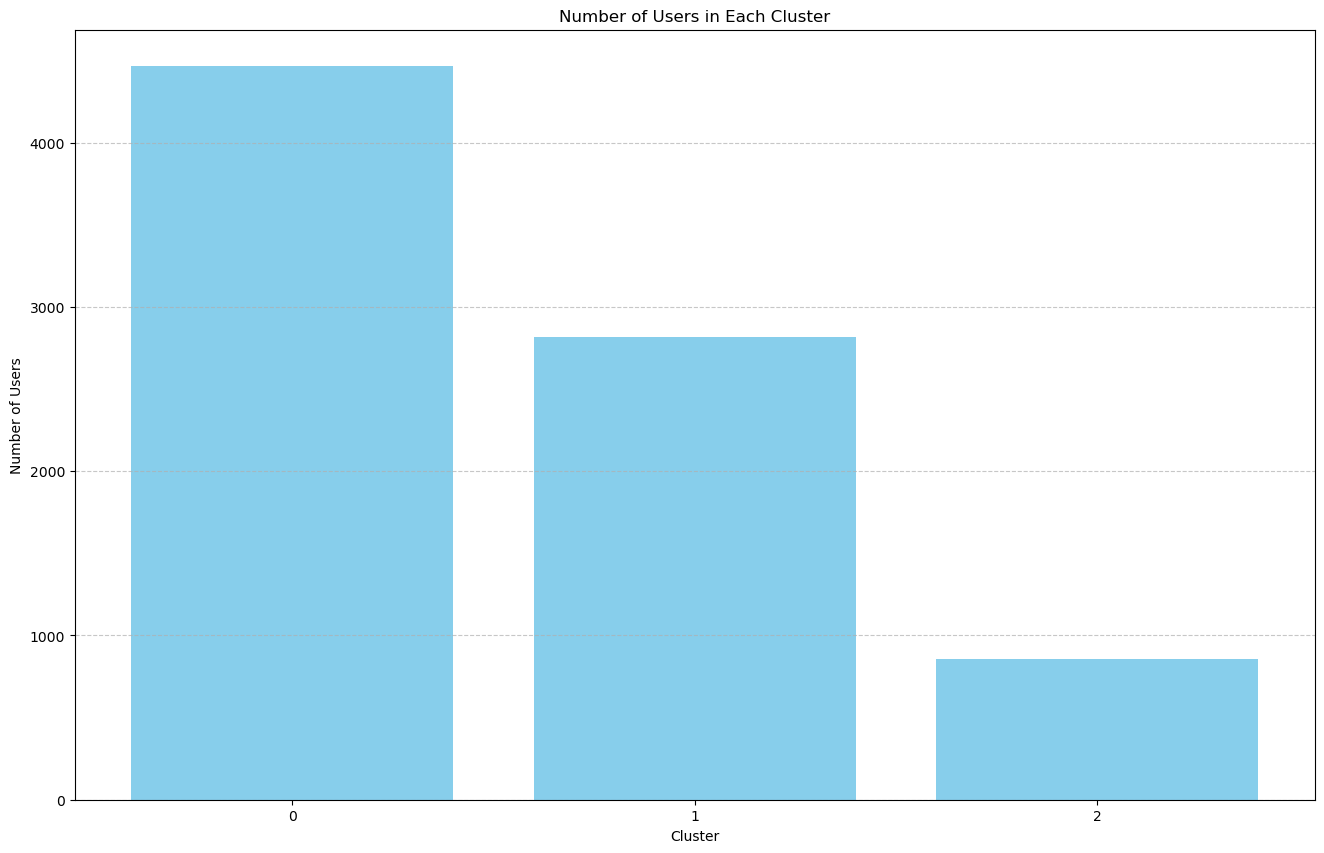

In [14]:
# Calculate the number of each cluster 
cluster_counts = user_summary['Cluster'].value_counts().sort_index()
print(cluster_counts)

plt.figure(figsize=(16, 10)) 
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue') 

plt.xlabel('Cluster')  # X
plt.ylabel('Number of Users')  # Y
plt.title('Number of Users in Each Cluster')  # Title
plt.xticks(cluster_counts.index)  # Mark the X axis by the using the cluster number 
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add the grid

plt.show()